<a href="https://colab.research.google.com/github/Jrodri5891/predictions_model/blob/main/Inflation_US_Dollar_HND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import mean_squared_error
%matplotlib inline

In [32]:
from google.colab import files
uploaded = files.upload()



Saving Inflacion_moneda_dollar.xlsx to Inflacion_moneda_dollar (1).xlsx


In [33]:
df = pd.read_excel('Inflacion_moneda_dollar.xlsx')
df = df[df['Mes'] != 'Promedio']

max_cost_per_year = df.set_index('Mes').max().reset_index()
max_cost_per_year.columns = ['Year', 'Dollar Cost']

max_cost_per_year.head()



,Year,Dollar Cost
0,1996,12.9300
1,1997,13.2600
2,1998,13.9200
3,1999,14.6600
4,2000,15.3094


In [43]:
X = max_cost_per_year[['Year']]
y = max_cost_per_year[['Dollar Cost']]

<Axes: xlabel='Year', ylabel='Dollar Cost'>

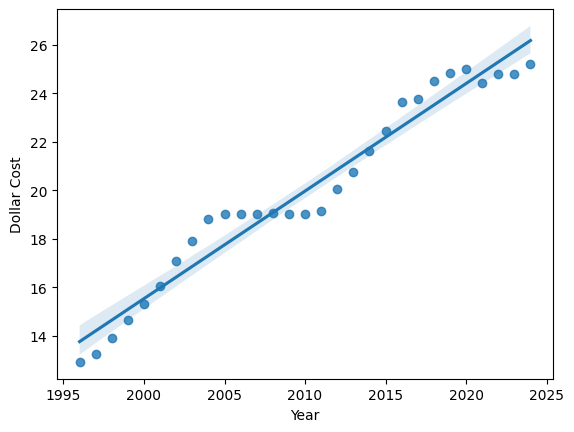

In [44]:
sns.regplot(x= X, y= y, data = max_cost_per_year)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
predictions = model.predict(X_test)

In [72]:
future_year = pd.DataFrame({'Year': [2035]})
future_dollar_cost = model.predict(future_year)
print(f"Predicted inflation in 2035: ${future_dollar_cost[0].item():.2f}")


Predicted inflation in 2035: $31.15


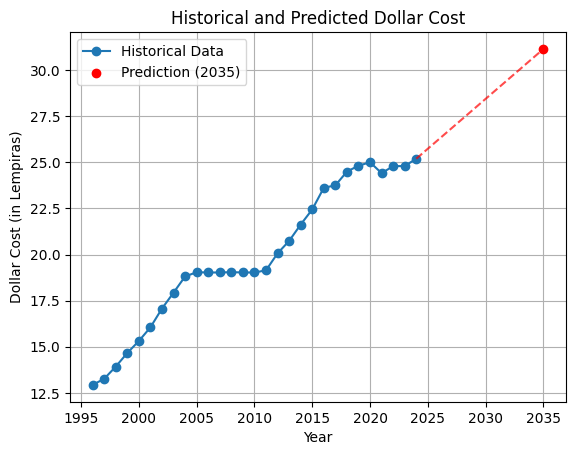

Predicted inflation in 2035: $31.15


In [70]:
plt.plot(max_cost_per_year['Year'], max_cost_per_year['Dollar Cost'], label='Historical Data', marker='o')

# Add prediction to the graph
plt.scatter(2035, future_dollar_cost, color='red', label='Prediction (2035)', zorder=5)

# Change: Use max_cost_per_year instead of df
plt.plot([max_cost_per_year['Year'].iloc[-1], 2035], [max_cost_per_year['Dollar Cost'].iloc[-1], future_dollar_cost[0][0]], linestyle='--', color='red', alpha=0.7)
# Add labels, legend, and title
plt.xlabel('Year')
plt.ylabel('Dollar Cost (in Lempiras)')
plt.title('Historical and Predicted Dollar Cost')
plt.legend()
plt.grid(True)
plt.show()
print(f"Predicted inflation in 2035: ${future_dollar_cost[0].item():.2f}")
